                                     
# IBM course exercise : analysing car prices
---

firstly we need to get the librarys 

In [9]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [10]:

df = pd.read_csv('./CarPrice.csv')
df=df._get_numeric_data()
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


The two plots that will be used in the following are defined here:

In [11]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    

In [12]:
    
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

---
</br><H2>Data Wrangling</H2></br>
Question 2 : Drop the column "price" and split the data into train and test 


In [13]:
y_data=df['price']
x_data=df.drop('price',axis=1)


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("# of test samples :", x_test.shape[0])
print("# of training samples:",x_train.shape[0])

# of test samples : 31
# of training samples: 174


In [14]:
clf=LinearRegression()
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.9, random_state=0)
clf.fit(x_train1[['horsepower']],y_train1)
clf.score(x_test1[['horsepower']],y_test1)

0.6665758686590226

***
## Cross-validation Score

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well our model performs in the real world. One reason for this is could be overfitting.

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features:


In [15]:
clf.fit(x_train[['horsepower', 'curbweight', 'enginesize', 'highwaympg']],y_train)
yhat_train=clf.predict(x_train[['horsepower', 'curbweight', 'enginesize', 'highwaympg']])
yhat_train[0:5]
yhat_test=clf.predict(x_test[['horsepower', 'curbweight', 'enginesize', 'highwaympg']])
yhat_test[0:5]

array([ 6040.63562913,  6657.6471882 ,  5889.65627694,  5449.42392824,
       10081.97408986])

C:\Users\nel_1\AppData\Local\Temp\ipykernel_19492\4075896347.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\nel_1\AppData\Local\Temp\ipykernel_19492\4075896347.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

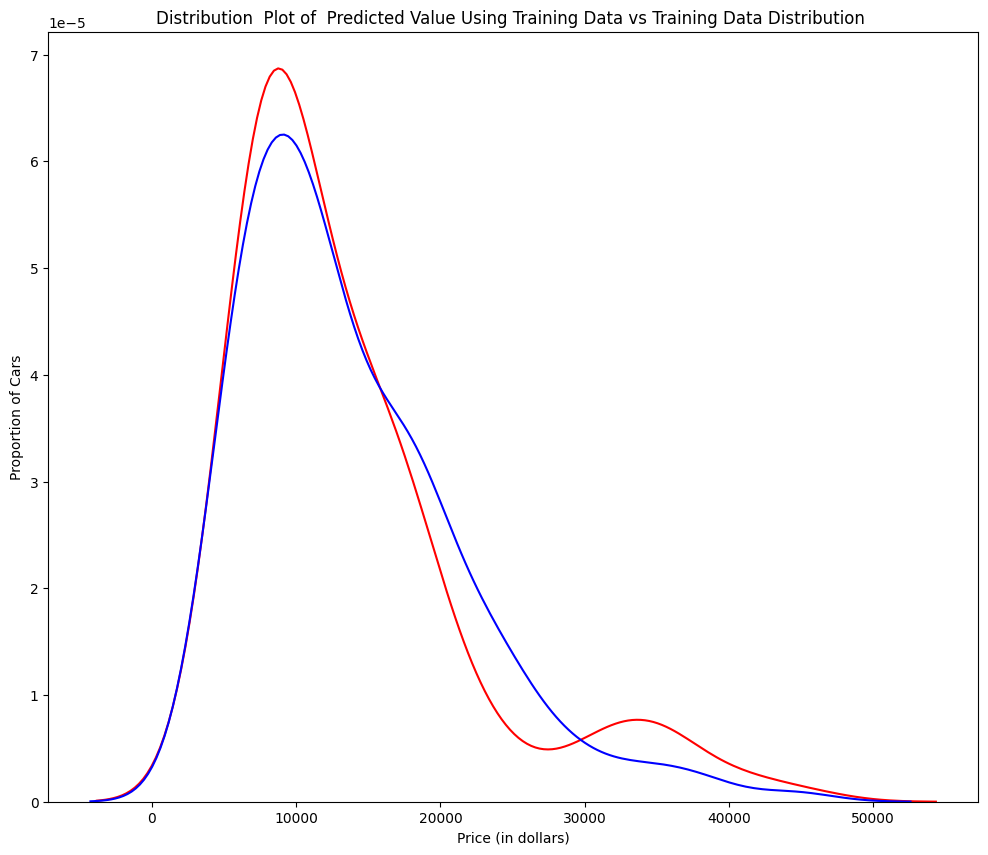

In [16]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)


C:\Users\nel_1\AppData\Local\Temp\ipykernel_19492\4075896347.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\nel_1\AppData\Local\Temp\ipykernel_19492\4075896347.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

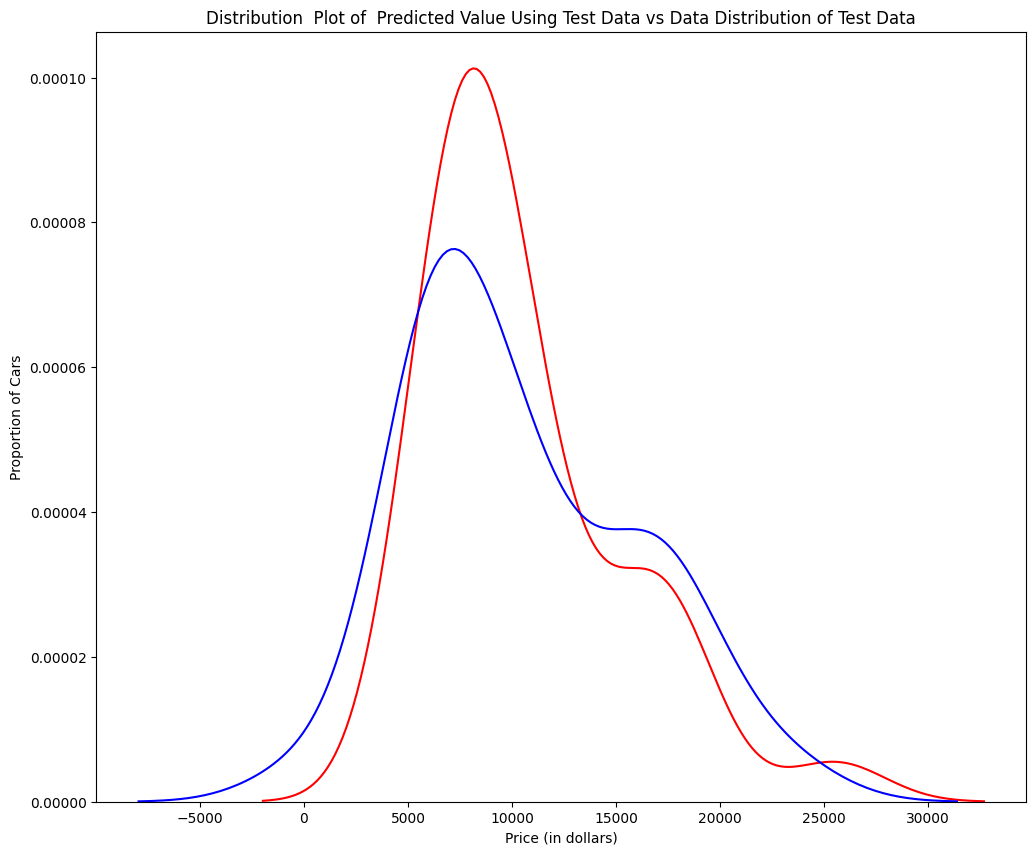

In [17]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## Overfitting

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

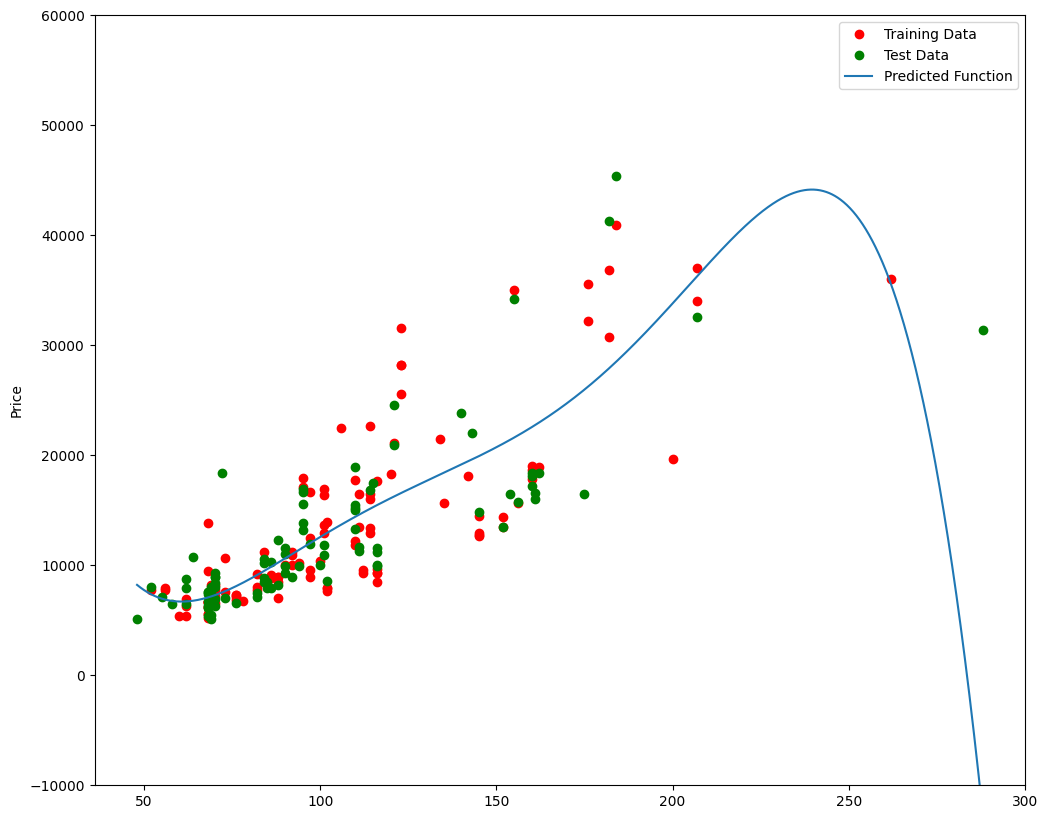

In [19]:
clf.fit(x_train_pr,y_train)
yhat=clf.predict(x_test_pr )
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,clf,pr)

The figure above shows a polynomial regression model. Red dots represent training data, green dots represent test data, and the blue line represents the model prediction.
<br>
<br>
<br>
R^2 of the training data:





In [20]:
clf.score(x_train_pr, y_train)

0.6818773114685908

<br>
R^2 of the test data:

In [21]:
clf.score(x_test_pr, y_test)


0.3076079498145302

<br>
<br>
The lower the R^2, the worse the model and a negative R^2 is a sign of overfitting.
<br>
Now let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

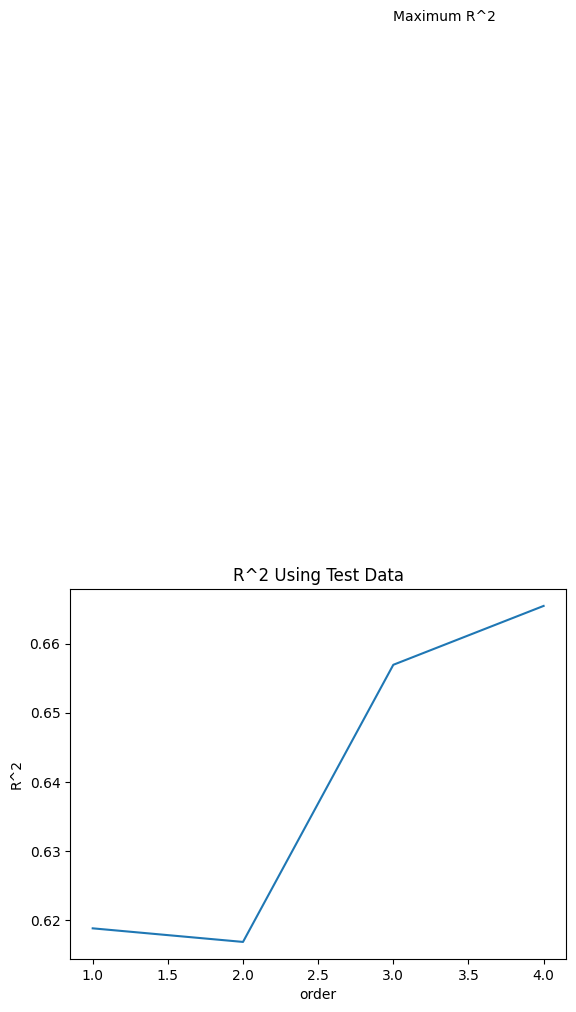

In [25]:
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr=pr.fit_transform(x_test[['horsepower']])    
    
    clf.fit(x_train_pr,y_train)
    
    Rsqu_test.append(clf.score(x_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  